<a href="https://colab.research.google.com/github/Eduardo-Marchi2025/Challenge_-DS_Alura_TelecomX_BR/blob/main/Challenge_TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px




Vou criar uma variável com o nome `dados_TelecomX`.
E vou usar a função `pd.read_json`. Esta é a função responsável por fazer a leitura dos arquivos em formato JSON

In [2]:
dados_TelecomX = pd.read_json('/content/TelecomX_Data.json')

Agora vou visualizar o Data Frame.

In [3]:
dados_TelecomX

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

As informações estão "aninhadas".

In [4]:
# Separar as colunas não aninhadas que quero manter
df_base = dados_TelecomX[['customerID', 'Churn']]

# Normalizar as colunas aninhadas principais
df_normalizado_customer = pd.json_normalize(dados_TelecomX['customer'])
df_normalizado_phone = pd.json_normalize(dados_TelecomX['phone'])
df_normalizado_internet = pd.json_normalize(dados_TelecomX['internet'])

# Normalizar a coluna 'account'. O json_normalize já lidará com o dicionário aninhado 'charges'.
df_normalizado_account = pd.json_normalize(dados_TelecomX['account'])

# Como o dicionário 'charges' já foi normalizado dentro de df_normalizado_account,
# não preciso normalizar ou remover 'charges' separadamente.
# O resultado de df_normalizado_account já contém as colunas 'Charges.Monthly' e 'Charges.Total'.

# Concatenar horizontalmente todas as DataFrames normalizadas e a base
df_normalizado_completo = pd.concat([
    df_base.reset_index(drop=True), # Resetar índice para garantir o alinhamento
    df_normalizado_customer.reset_index(drop=True),
    df_normalizado_phone.reset_index(drop=True),
    df_normalizado_internet.reset_index(drop=True),
    df_normalizado_account.reset_index(drop=True)
], axis=1)

# Visualizar o DataFrame normalizado completo
df_normalizado_completo.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
#Ver o tamanho do arquivo
df_normalizado_completo.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [6]:
#Ver o tipo do arquivo
type(df_normalizado_completo)

pandas.core.frame.DataFrame

In [7]:
# Ver a quantidade de linhas e colunas
df_normalizado_completo.shape

(7267, 21)

In [8]:
# ver todas as colunas existentes
df_normalizado_completo.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [9]:
#Ver o tipo de Dado de cada coluna
df_normalizado_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
# Ver dados do tipo "object" Textuais, Strings.
df_normalizado_completo['customerID']

,customerID
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


In [11]:
# Ver dados do tipo "int64" (tenure) Inteiros, e "float64" (Charges.Monthly) Decimais.
df_normalizado_completo [['tenure', 'Charges.Monthly']]

,tenure,Charges.Monthly
0,9,65.60
1,9,59.90
2,4,73.90
3,13,98.00
4,3,83.90
...,...,...
7262,13,55.15
7263,22,85.10
7264,2,50.30
7265,67,67.85


In [12]:
#Alterar os nomes das categorias para usar letras minúsculas e underscores (_).
# Padronizar todas as colunas
df_normalizado_completo.columns = (
    df_normalizado_completo.columns
    .str.strip()
    .str.replace('([a-z0-9])([A-Z])', r'\1_\2', regex=True)
    .str.replace(' ', '_')
    .str.lower()
)

# Alterar o nome de duas colunas para melhor visualização da análise.
df_normalizado_completo.rename(columns={'charges.monthly': 'charges_monthly',
                             'charges.total': 'charges_total'}, inplace=True)


# Verificar os nomes das colunas novamente.
df_normalizado_completo.columns

# Verificar os dados nulos
df_normalizado_completo.isnull().sum()


,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [13]:
# Transformar os dados da coluna "total_charges" de strings para "float64" (Decimais).
df_normalizado_completo ['charges_total'] = pd.to_numeric(df_normalizado_completo['charges_total'], errors='coerce')

In [14]:
df_normalizado_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

In [15]:
#Verificar se tem algum dados duplicado.
df_normalizado_completo['customer_id'].duplicated().sum()

np.int64(0)

In [16]:
#Verificar a existencia de Valores ausentes (NaN)
df_normalizado_completo.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [17]:
#Verificar quais registros estão com charges_total nulo, ausentes (NaN).
df_normalizado_completo[df_normalizado_completo['charges_total'].isnull()]

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Como o campo ternure está com o dado de "0", este é um idicador que o cliente ainda não têm a assinatura por um periodo de tempo maior que um mês. Portanto, esse seria o motivo do campo da coluna "charges_total" estar com o campo vazio. Mas também mostra a coluna "churn" com todos os campos com a informação "No". Certamente esses onze (11) Clientes não serão úteis para a nossa avaliação, inclusive podem comprometer as médias. O ideal é removê-los do DataFrame que estamos trabalhando.

In [18]:
#Remover as 11 linhas que na Coluna "charges_total", o campo está vazio.
df_normalizado_completo = df_normalizado_completo.dropna(subset=['charges_total'])

In [19]:
#Verificar, novamente, a existencia de Valores ausentes (NaN)
df_normalizado_completo.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [20]:
#Verificar dados inconsistentes ou com erro de formatação.
for col in df_normalizado_completo.select_dtypes(include='object').columns:
    print(f"{col}: {df_normalizado_completo[col].unique()}")

customer_id: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes' 'No phone service']
internet_service: ['DSL' 'Fiber optic' 'No']
online_security: ['No' 'Yes' 'No internet service']
online_backup: ['Yes' 'No' 'No internet service']
device_protection: ['No' 'Yes' 'No internet service']
tech_support: ['Yes' 'No' 'No internet service']
streaming_tv: ['Yes' 'No' 'No internet service']
streaming_movies: ['No' 'Yes' 'No internet service']
contract: ['One year' 'Month-to-month' 'Two year']
paperless_billing: ['Yes' 'No']
payment_method: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


Foi encontrado as seguintes colunas à serem tratadas:

- **churn:** ['No' 'Yes' ''] - Contem campos com [ ' ' ].

- **multiple_lines:** ['No' 'Yes' 'No phone service'] - Contem campos com ['No' e 'No phone service'] A mesma informação com "texto" diferente.

- **online_security:** ['No' 'Yes' 'No internet service'] - Contem campos com ['No' e 'No internet service'] A mesma informação com "texto" diferente.

- **online_backup:** ['Yes' 'No' 'No internet service'] - Contem campos com ['No' e 'No internet service'] A mesma informação com "texto" diferente.
- **device_protection:** ['No' 'Yes' 'No internet service'] - Contem campos com ['No' e 'No internet service'] A mesma informação com "texto" diferente.
- **tech_support:** ['Yes' 'No' 'No internet service'] - Contem campos com ['No' e 'No internet service'] A mesma informação com "texto" diferente.

- **streaming_tv:** ['Yes' 'No' 'No internet service'] - Contem campos com ['No' e 'No internet service'] A mesma informação com "texto" diferente.

- **streaming_movies:** ['No' 'Yes' 'No internet service'] - Contem campos com ['No' e 'No internet service'] A mesma informação com "texto" diferente.

In [21]:
#Encontrado dados, na coluna "churn", com informações que podem comprometer as avaliações
df_normalizado_completo[df_normalizado_completo['churn'] == '']

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [22]:
# Remover essas linhas para não comprometer a avaliação.
df_normalizado_completo = df_normalizado_completo[df_normalizado_completo['churn'] != '']

In [23]:
#Verificar se todas as linhas, inconsistentes, da coluna "churn" foram removidas.
df_normalizado_completo[df_normalizado_completo['churn'] == '']

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total


In [24]:
#Encontrado dados, na coluna "multiple_lines" com ['No' 'Yes' 'No phone service']". Adotei o dado "No phone service" como "No".
df_normalizado_completo[df_normalizado_completo['multiple_lines'] == 'No phone service']

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
10,0017-DINOC,No,Male,0,No,No,54,No,No phone service,DSL,...,No,No,Yes,Yes,No,Two year,No,Credit card (automatic),45.20,2460.55
14,0019-GFNTW,No,Female,0,No,No,56,No,No phone service,DSL,...,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),45.05,2560.10
16,0020-JDNXP,No,Female,0,Yes,Yes,34,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,One year,No,Mailed check,61.25,1993.20
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.10
25,0032-PGELS,Yes,Female,0,Yes,Yes,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.50,30.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7200,9906-NHHVC,No,Female,1,No,No,65,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),53.50,3517.90
7201,9907-SWKKF,Yes,Female,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,25.05,25.05
7218,9928-BZVLZ,No,Female,0,No,No,12,No,No phone service,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,49.85,552.10
7238,9955-QOPOY,No,Male,0,Yes,No,69,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),60.80,4263.40


In [25]:
# Substitui o valor 'No phone service' por 'No' na coluna 'multiple_lines'
df_normalizado_completo['multiple_lines'] = df_normalizado_completo['multiple_lines'].replace('No phone service', 'No')

# Verificar se a substituição foi executada.
print(df_normalizado_completo['multiple_lines'].unique())

['No' 'Yes']


In [26]:
#Encontrado dados, na coluna "online_security" com ['No' 'Yes' 'No internet service']". Adotei o dado "No internet service" como "No".
df_normalizado_completo[df_normalizado_completo['online_security'] == 'No internet service']

# Substitui o valor 'No internet service' por 'No' na coluna 'online_security'
df_normalizado_completo['online_security'] = df_normalizado_completo['online_security'].replace('No internet service', 'No')

# Verificar se a substituição foi executada.
print(df_normalizado_completo['online_security'].unique())

['No' 'Yes']


In [27]:
#Encontrado dados, na coluna "online_backup" com ['Yes' 'No' 'No internet service']". Adotei o dado "No internet service" como "No".
df_normalizado_completo[df_normalizado_completo['online_backup'] == 'No internet service']

# Substitui o valor 'No internet service' por 'No' na coluna 'online_backup'
df_normalizado_completo['online_backup'] = df_normalizado_completo['online_backup'].replace('No internet service', 'No')

# Verificar se a substituição foi executada.
print(df_normalizado_completo['online_backup'].unique())

['Yes' 'No']


In [28]:
#Encontrado dados, na coluna "device_protection" com ['Yes' 'No' 'No internet service']". Adotei o dado "No internet service" como "No".
df_normalizado_completo[df_normalizado_completo['device_protection'] == 'No internet service']

# Substitui o valor 'No internet service' por 'No' na coluna 'device_protection'
df_normalizado_completo['device_protection'] = df_normalizado_completo['device_protection'].replace('No internet service', 'No')

# Verificar se a substituição foi executada.
print(df_normalizado_completo['device_protection'].unique())

['No' 'Yes']


In [29]:
#Encontrado dados, na coluna "tech_support" com ['Yes' 'No' 'No internet service']". Adotei o dado "No internet service" como "No".
df_normalizado_completo[df_normalizado_completo['tech_support'] == 'No internet service']

# Substitui o valor 'No internet service' por 'No' na coluna 'tech_support'
df_normalizado_completo['tech_support'] = df_normalizado_completo['tech_support'].replace('No internet service', 'No')

# Verificar se a substituição foi executada.
print(df_normalizado_completo['tech_support'].unique())

['Yes' 'No']


In [30]:
#Encontrado dados, na coluna "streaming_tv" com ['Yes' 'No' 'No internet service']". Adotei o dado "No internet service" como "No".
df_normalizado_completo[df_normalizado_completo['streaming_tv'] == 'No internet service']

# Substitui o valor 'No internet service' por 'No' na coluna 'streaming_tv'
df_normalizado_completo['streaming_tv'] = df_normalizado_completo['streaming_tv'].replace('No internet service', 'No')

# Verificar se a substituição foi executada.
print(df_normalizado_completo['streaming_tv'].unique())

['Yes' 'No']


In [31]:
#Encontrado dados, na coluna "streaming_movies" com ['Yes' 'No' 'No internet service']". Adotei o dado "No internet service" como "No".
df_normalizado_completo[df_normalizado_completo['streaming_movies'] == 'No internet service']

# Substitui o valor 'No internet service' por 'No' na coluna 'streaming_movies'
df_normalizado_completo['streaming_movies'] = df_normalizado_completo['streaming_movies'].replace('No internet service', 'No')

# Verificar se a substituição foi executada.
print(df_normalizado_completo['streaming_movies'].unique())

['No' 'Yes']


Criar uma nova coluna, "daily_charge". Para obte um idicador de valores, diários que o Cliente paga.
Assim melhora o refinamento da Análise estatística.

In [32]:
#Criar uma coluna "daily_charge", que calcula o gasto médio por dia com base no valor mensal.
df_normalizado_completo ['daily_charge'] = df_normalizado_completo ['charges_monthly'] /30.46

# Formatar a coluna "daily_charge" para exibir apenas duas casas decimais
df_normalizado_completo['daily_charge'] = df_normalizado_completo['daily_charge'].round(2)

In [33]:
# Visualizar a nova coluna criada, "daily-charge".
df_normalizado_completo[['charges_monthly', 'daily_charge']].head(10)

,charges_monthly,daily_charge
0,65.60,2.15
1,59.90,1.97
2,73.90,2.43
3,98.00,3.22
4,83.90,2.75
5,69.40,2.28
6,109.70,3.60
7,84.65,2.78
8,48.20,1.58
9,90.45,2.97


In [34]:
df_normalizado_completo.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_charge
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.15
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.75


In [35]:
# Adotei uma "padronização" de dados para facilitar os trabalhos de análises. Substitui o "Yes" e "No", por 1 e 0 respectivamente.
columns_yes_no = ['churn', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
df_normalizado_completo[columns_yes_no] = df_normalizado_completo[columns_yes_no].replace({'Yes': 1, 'No': 0})

<ipython-input-35-250136235>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado_completo[columns_yes_no] = df_normalizado_completo[columns_yes_no].replace({'Yes': 1, 'No': 0})


In [36]:
df_normalizado_completo.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_charge
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.15
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.75


In [37]:
#Conferir o Dtype de cada coluna, após a padronização.
df_normalizado_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   int64  
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   int64  
 11  online_backup      7032 non-null   int64  
 12  device_protection  7032 non-null   int64  
 13  tech_support       7032 non-null   int64  
 14  streaming_tv       7032 non-null   int64  
 15  streaming_movies   7032 non-null   int64  
 16  contract           7032 non-n

###💡 Eu preferi manter a coluna "customer_id", mesmo que ela não seja utilizada para as análises. Pois se houver a necessidade de "contactar" alguns Clientes, seja para Técnicas de retenção de Clientes, ofertas de "promoções" para Clientes com grande pontencial de "churn", ou ainda uma pesquisa sobre o (os) motivo (s) que que o levaram a cancelar o contrato. Supondo, que como "ID" do cliente tenha a possibilidade de acessar mais informações para contato com o Cliente.

##Salvar um arquivo, já tratado em .csv, usando como separador a vírgula.
Mantendo o mesmo separador "," do arquivo que recebemos.

In [38]:
df_normalizado_completo.to_csv('TelecomX_BR_normalizado.csv', index=False)

##Salvar um arquivo, já tratado em .json


In [39]:
df_normalizado_completo.to_json('TelecomX_BR_normalizado.json')

#📊 Carga e análise

##Análise Descritiva
Estatísticas descritivas para os dados numéricos:

In [40]:
df_normalizado_completo.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,charges_monthly,charges_total,daily_charge
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.127298
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.987802
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.170000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


### ✔️ 1. **Proporção de Evasão (Churn)**

Média (churn): 0.265 → Cerca de 26,6% dos clientes cancelaram o serviço.

>    📢❗🚨 Essa taxa é muito alta, há um problema de retenção.

###✔️ 2. Tempo como Cliente (tenure)

Média: 32,42 meses

Mediana: 29 meses

Máximo: 72 meses

Mínimo: 1 mês


>  📢❗🚨 A maior porcentagem de clientes permanecem por mais de 2 anos. Porem a porcentagem de clientes com permanência a menos tempo, onde está o grupo de risco de evasão, é significativa, e requer muita atenção.

###✔️ 3. Gastos Mensais e Totais


<table ##style="border-collapse: collapse; border: none;">
  <tr>
    <td>Variável</td>
    <td>Média</td>
    <td>Mediana</td>
    <td>Mínimo</td>
    <td>Máximo</td>
  </tr>
  <tr>
    <td>charges_monthly</td>
    <td>R$ 64,80</td>
    <td>R$ 70,35</td>
    <td>R$ 18,25</td>
    <td>R$ 118,75</td>
  </tr>
  <tr>
    <td>charges_total</td>
    <td>R$ 2.283,30</td>
    <td>R$ 1.397,48</td>
    <td>R$ 18,80</td>
    <td>R$ 8.648,80</td>
  </tr>
  <tr>
    <td>daily_charge</td>
    <td>R$ 2,16</td>
    <td>R$ 2,35</td>
    <td>R$ 0,61</td>
    <td>R$ 3,96</td>
  </tr>
</table>



>   📢❗🚨 Clientes com mensalidades mais altas tendem a ter maior risco de evasão. Essa hipótese pode ser testada nas próximas análises.

###✔️ 4. Perfil dos dados do Cliente e do Serviço Contratado

Idosos (senior_citizen): Apenas 16% dos clientes têm 65 anos ou mais.

Com parceiro(a): ~48%

Com dependentes: ~30%

Com serviço telefônico: ~90%

Fatura digital (paperless_billing): ~59%

>   📢❗🚨 A maioria dos clientes não é idosa, não tem dependentes e utiliza cobrança digital. Esses fatores podem ter relação com o churn dependendo da combinação com outras variáveis (como tipo de contrato ou método de pagamento).

---
---

Análise da coluna tenure (tempo como cliente)

Avalia o tempo médio e mediano que os clientes permanecem na empresa. Essa métrica é útil para entender a fidelidade média dos clientes e se há tendência de evasão em ciclos curtos.

In [41]:
print(f"Tempo médio como cliente: {df_normalizado_completo['tenure'].mean():.2f}")
print(f"Mediana do tempo:  {df_normalizado_completo['tenure'].median():.2f}")

Tempo médio como cliente: 32.42
Mediana do tempo:  29.00


Investigar o valor financeiro investido pelos clientes mensalmente e ao longo de sua jornada. Faturas muito altas podem indicar risco de evasão, enquanto valores baixos podem sugerir menor engajamento

In [42]:
print(f"Fatura mensal média: {df_normalizado_completo['charges_monthly'].mean():.2f}")
print(f"Gasto total médio: {df_normalizado_completo['charges_total'].mean():.2f}")

Fatura mensal média: 64.80
Gasto total médio: 2283.30



Identifica a proporção de clientes que permaneceram vs. cancelaram o serviço. Essa métrica é crucial para entender o problema: quanto maior a taxa de evasão, maior a necessidade de estratégias de retenção.

In [43]:
df_normalizado_completo['churn'].value_counts(normalize=True) * 100

,proportion
churn,
0,73.421502
1,26.578498


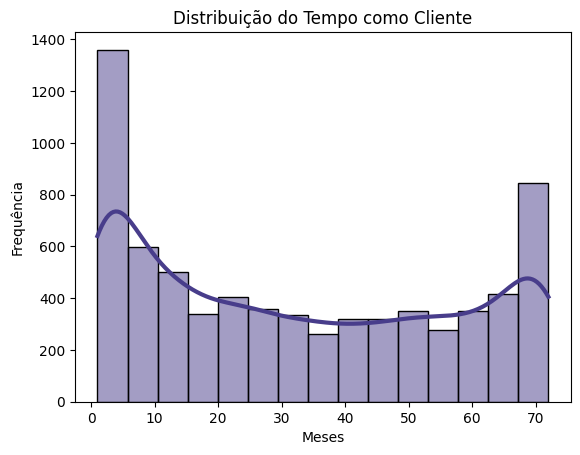

In [44]:
# Criando o gráfico com cores personalizadas
# Passando linewidth para line_kws para controlar a linha do KDE
sns.histplot(df_normalizado_completo['tenure'], kde=True, color="darkslateblue", line_kws={"linewidth": 3})
plt.title("Distribuição do Tempo como Cliente")
plt.xlabel("Meses")
plt.ylabel("Frequência")
plt.show()

#Distribuição da Evasão
###**📊 Visualização da Evasão de Clientes (Churn)**

A seguir, apresentamos dois gráficos que ilustram a distribuição da variável churn, responsável por indicar se o cliente deixou ou permaneceu na empresa:

Gráfico de Barras: mostra a contagem absoluta de clientes que saíram (1) e que permaneceram (0).

Gráfico de Pizza: mostra a proporção percentual entre os dois grupos.

Distribuição Absoluta Distribuição Percentual

###✔️ Os gráficos acima revelam que cerca de 26,6% dos clientes saíram da empresa, enquanto 73,4% permaneceram.

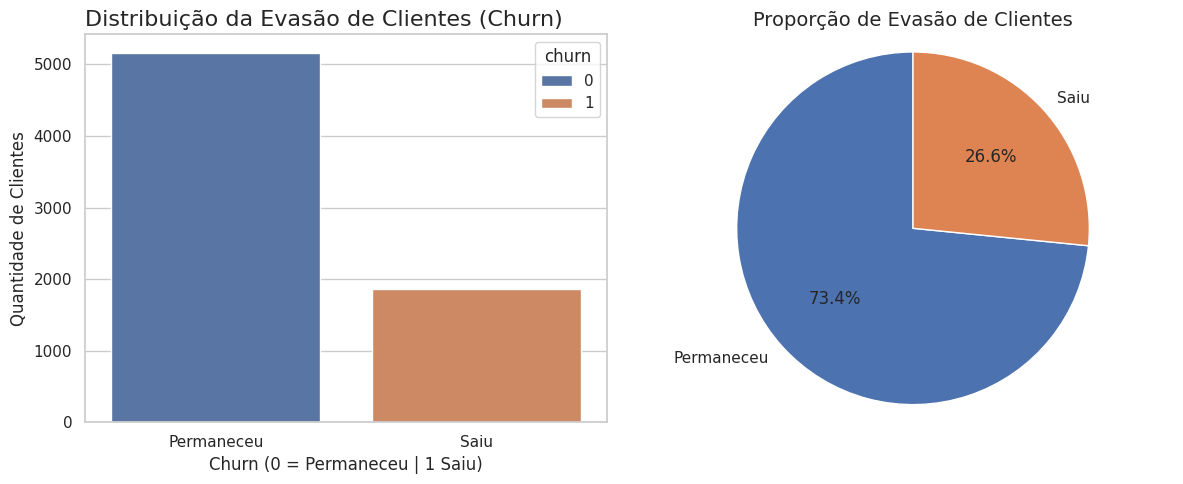

In [45]:
churn_counts = df_normalizado_completo['churn'].value_counts()
labels = ['Permaneceu', 'Saiu']
colors = ['#4c72b0', '#dd8452']

sns.set(style='whitegrid')

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='churn', data=df_normalizado_completo, hue='churn', palette= colors, ax=axes[0])
axes[0].set_title('Distribuição da Evasão de Clientes (Churn)', loc='left', fontsize=16)
axes[0].set_xlabel('Churn (0 = Permaneceu | 1 Saiu)', fontsize=12)
axes[0].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(labels)


axes[1].pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Proporção de Evasão de Clientes', fontsize=14)
axes[1].axis('equal')

fig.savefig('proporcao-evasao-clientes.png', transparent=False, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#Contagem de Evasão por Variáveis Categóricas
Essa etapa busca identificar padrões na evasão de clientes ao analisar variáveis categóricas, como gênero, tipo de contrato e método de pagamento. A ideia é compreender se certos perfis têm maior probabilidade de cancelar o serviço, permitindo direcionar estratégias mais eficazes para retenção.

###Dicionário para deixar os rótulos mais legíveis.

In [46]:
nomes_legiveis = {
    'gender': 'Gênero',
    'contract': 'Tipo de Contrato',
    'payment_method': 'Forma de Pagamento',
    'internet_service': 'Serviço de Internet',
    'streaming_tv': 'Streaming de TV',
    'multiple_lines': 'Linhas Telefônicas',
    'churn': 'Evasão',
}

Função responsável por gerar gráficos que mostram a distribuição absoluta de clientes que cancelaram o serviço.

In [47]:
def plot_churn_plotly(col):
    # Substitui os valores binários para legenda
    dados_plot = df_normalizado_completo.copy()
    dados_plot['churn'] = dados_plot['churn'].replace({0: 'Permaneceu', 1: 'Saiu'})

    fig = px.histogram(
        dados_plot,
        x=col,
        color='churn',
        barmode='group',
        text_auto=True,
        color_discrete_map={'Permaneceu': '#4c72b0', 'Saiu': '#dd8452'},
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Status do Cliente'
        }
    )

    fig.update_layout(

        title=f'Evasão por {nomes_legiveis.get(col, col).title()}',
        xaxis_title=nomes_legiveis.get(col, col).title(),
        yaxis_title='Quantidade de Clientes',
        legend_title='Status',
        bargap=0.2
    )

    fig.show()


Visualização da proporção de clientes que cancelaram o serviço, permitindo uma análise clara da taxa de churn e possíveis tendências.

In [48]:
def plot_churn_percent_plotly(col):
    # Cópia dos dados
    df = df_normalizado_completo.copy()

    # Agrupar e calcular a proporção de churn = 1
    proporcao = (
        df.groupby(col)['churn']
        .mean()
        .reset_index()
        .sort_values('churn', ascending=True)
    )
    proporcao['churn'] *= 100  # converter para %

    # Gráfico com Plotly horizontal
    fig = px.bar(
        proporcao,
        x='churn',
        y=col,
        orientation='h',
        text='churn',
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Evasão (%)'
        },
        color='churn',
        color_continuous_scale='Reds'
    )

    fig.update_layout(

        title=f'Proporção de Evasão por {nomes_legiveis.get(col, col).title()}',
        xaxis_title='Evasão (%)',
        yaxis_title=nomes_legiveis.get(col, col).title(),
        coloraxis_showscale=False
    )

    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.show()

**Evasão por Tipo de Contrato.**

 Como pode ser observado o Tipo de Contrato mês a mês (Month-to-Month) tem a maior insidência de cancelamentos.

In [49]:
plot_churn_plotly('contract')

**Evasão por Forma de pagamento.**

 O Cheque eletrônico está com maior indice de evasão. Com 45% das evasões dos clientes.

In [50]:
plot_churn_plotly('payment_method')
plot_churn_percent_plotly('payment_method')

**Evasão por Serviço de Internet.**

A fibra optica consiste com a maior taxa de evasão.

In [51]:
plot_churn_plotly('internet_service')
plot_churn_percent_plotly('internet_service')

**Evasão por Gênero.**

 As mulheres apresentam um número um pouco maior de evasão em relação aos homens.

In [52]:
df = df_normalizado_completo.copy()

genero_churn = (
        df.groupby('gender')['churn']
        .mean()
        .reset_index()
        .sort_values('churn', ascending=False)
    )
genero_churn['churn'] *= 100

fig = px.bar(
        genero_churn,
        x='gender',
        y='churn',
        text='churn',
        labels={'gender': 'Gênero', 'churn': 'Evasão (%)'},
        color='churn',
        color_continuous_scale='balance'
    )

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
        title='Proporção de Evasão por Gênero',
        yaxis_title='Evasão (%)',
        xaxis_title='Gênero',
        coloraxis_showscale=False
    )

fig.show()

##**Contagem de Evasão por Variáveis Numéricas**

Nesta seção, comparamos a distribuição de quatro variáveis numéricas — tenure, charges_monthly, charges_total e daily_charge — entre clientes que permaneceram e os que cancelaram seus serviços (churn).

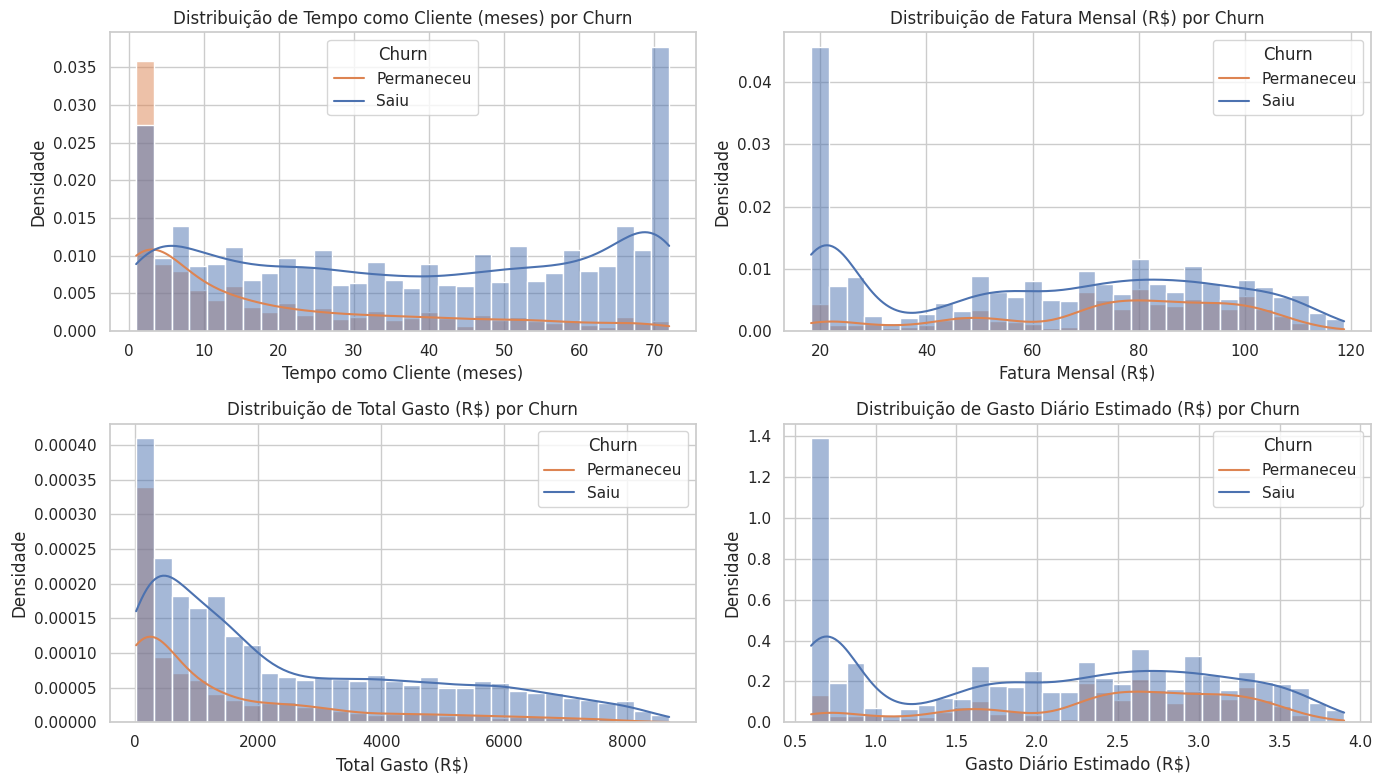

In [53]:
variaveis = ['tenure', 'charges_monthly', 'charges_total', 'daily_charge']
titulos = {
    'tenure': 'Tempo como Cliente (meses)',
    'charges_monthly': 'Fatura Mensal (R$)',
    'charges_total': 'Total Gasto (R$)',
    'daily_charge': 'Gasto Diário Estimado (R$)'
}

colors = ['#4c72b0', '#dd8452']

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()  # facilita iteração

# Gerar os 4 gráficos
for i, col in enumerate(variaveis):
    sns.histplot(
        df_normalizado_completo,
        x=col,
        hue='churn',
        kde=True,
        palette= colors,
        bins=30,
        stat='density',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribuição de {titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel(titulos[col])
    axes[i].set_ylabel('Densidade')
    axes[i].legend(title='Churn', labels=['Permaneceu', 'Saiu'])

    fig.savefig('histograma.png', transparent=False, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Essa análise nos ajuda a entender como o comportamento financeiro e o tempo de permanência impactam a evasão

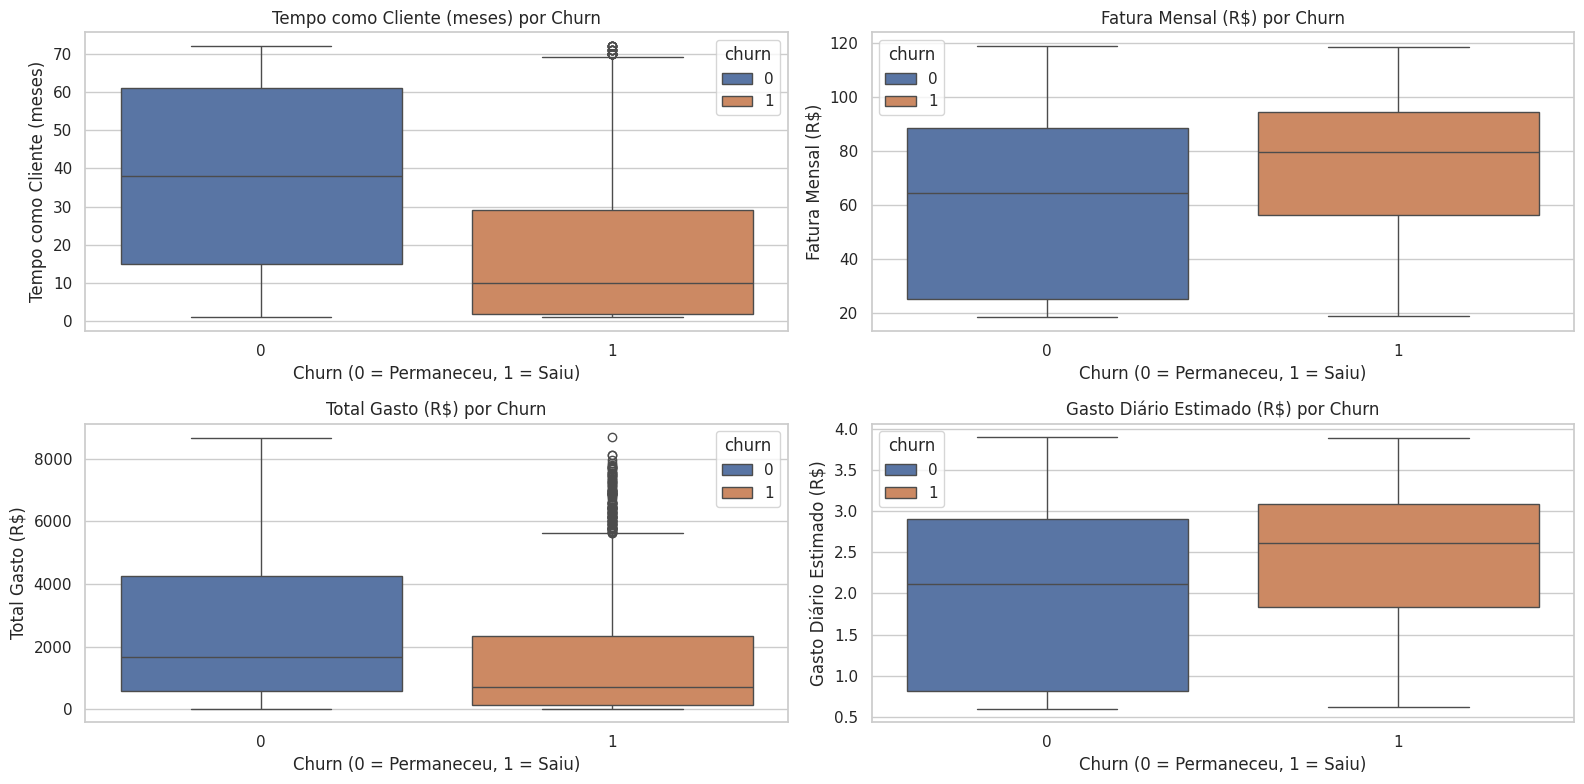

In [54]:
#charges_monthly	charges_total	daily_charge df_normalizado_completo
variaveis = ['tenure', 'charges_monthly', 'charges_total', 'daily_charge']
titulos = {
    'tenure': 'Tempo como Cliente (meses)',
    'charges_monthly': 'Fatura Mensal (R$)',
    'charges_total': 'Total Gasto (R$)',
    'daily_charge': 'Gasto Diário Estimado (R$)'
}

colors = ['#4c72b0', '#dd8452']

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

# Geração dos boxplots
for i, col in enumerate(variaveis):
    sns.boxplot(
        df_normalizado_completo,
        x='churn',
        y=col,
        hue='churn',
        palette= colors,
        ax=axes[i]
    )
    axes[i].set_title(f'{titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
    axes[i].set_ylabel(titulos[col])

plt.tight_layout()
plt.show()

##✔️ 📝 Resumo dos Principais Pontos



<table ##style="border-collapse: collapse; border: none;">
  <tr>
    <td>Indicador</td>
    <td>Ponto de risco</td>
      </tr>
  <tr>
    <td>tenure</td>
    <td>Alta taxa de churn nos primeiros meses</td>
      </tr>
  <tr>
    <td>charges_monthly</td>
    <td>Clientes com mensalidades mais altas tendem a cancelar mais.
    </tr>
  </tr>
  <tr>
    <td>charges_total</td>
    <td>Cancelamentos ocorrem antes que o valor da receita fique alta</td>
      </tr>

  <tr>
    <td>dayle_total</td>
    <td>Baixo uso diário pode indicar menor interesse e maior risco.
    </tr>
  <tr>
    <td>Variáveis Categóricas</td>
    <td>Variável para cada categoria - Respostas visuais e textuais no gráfico.</td>
   
  </tr>
</table>



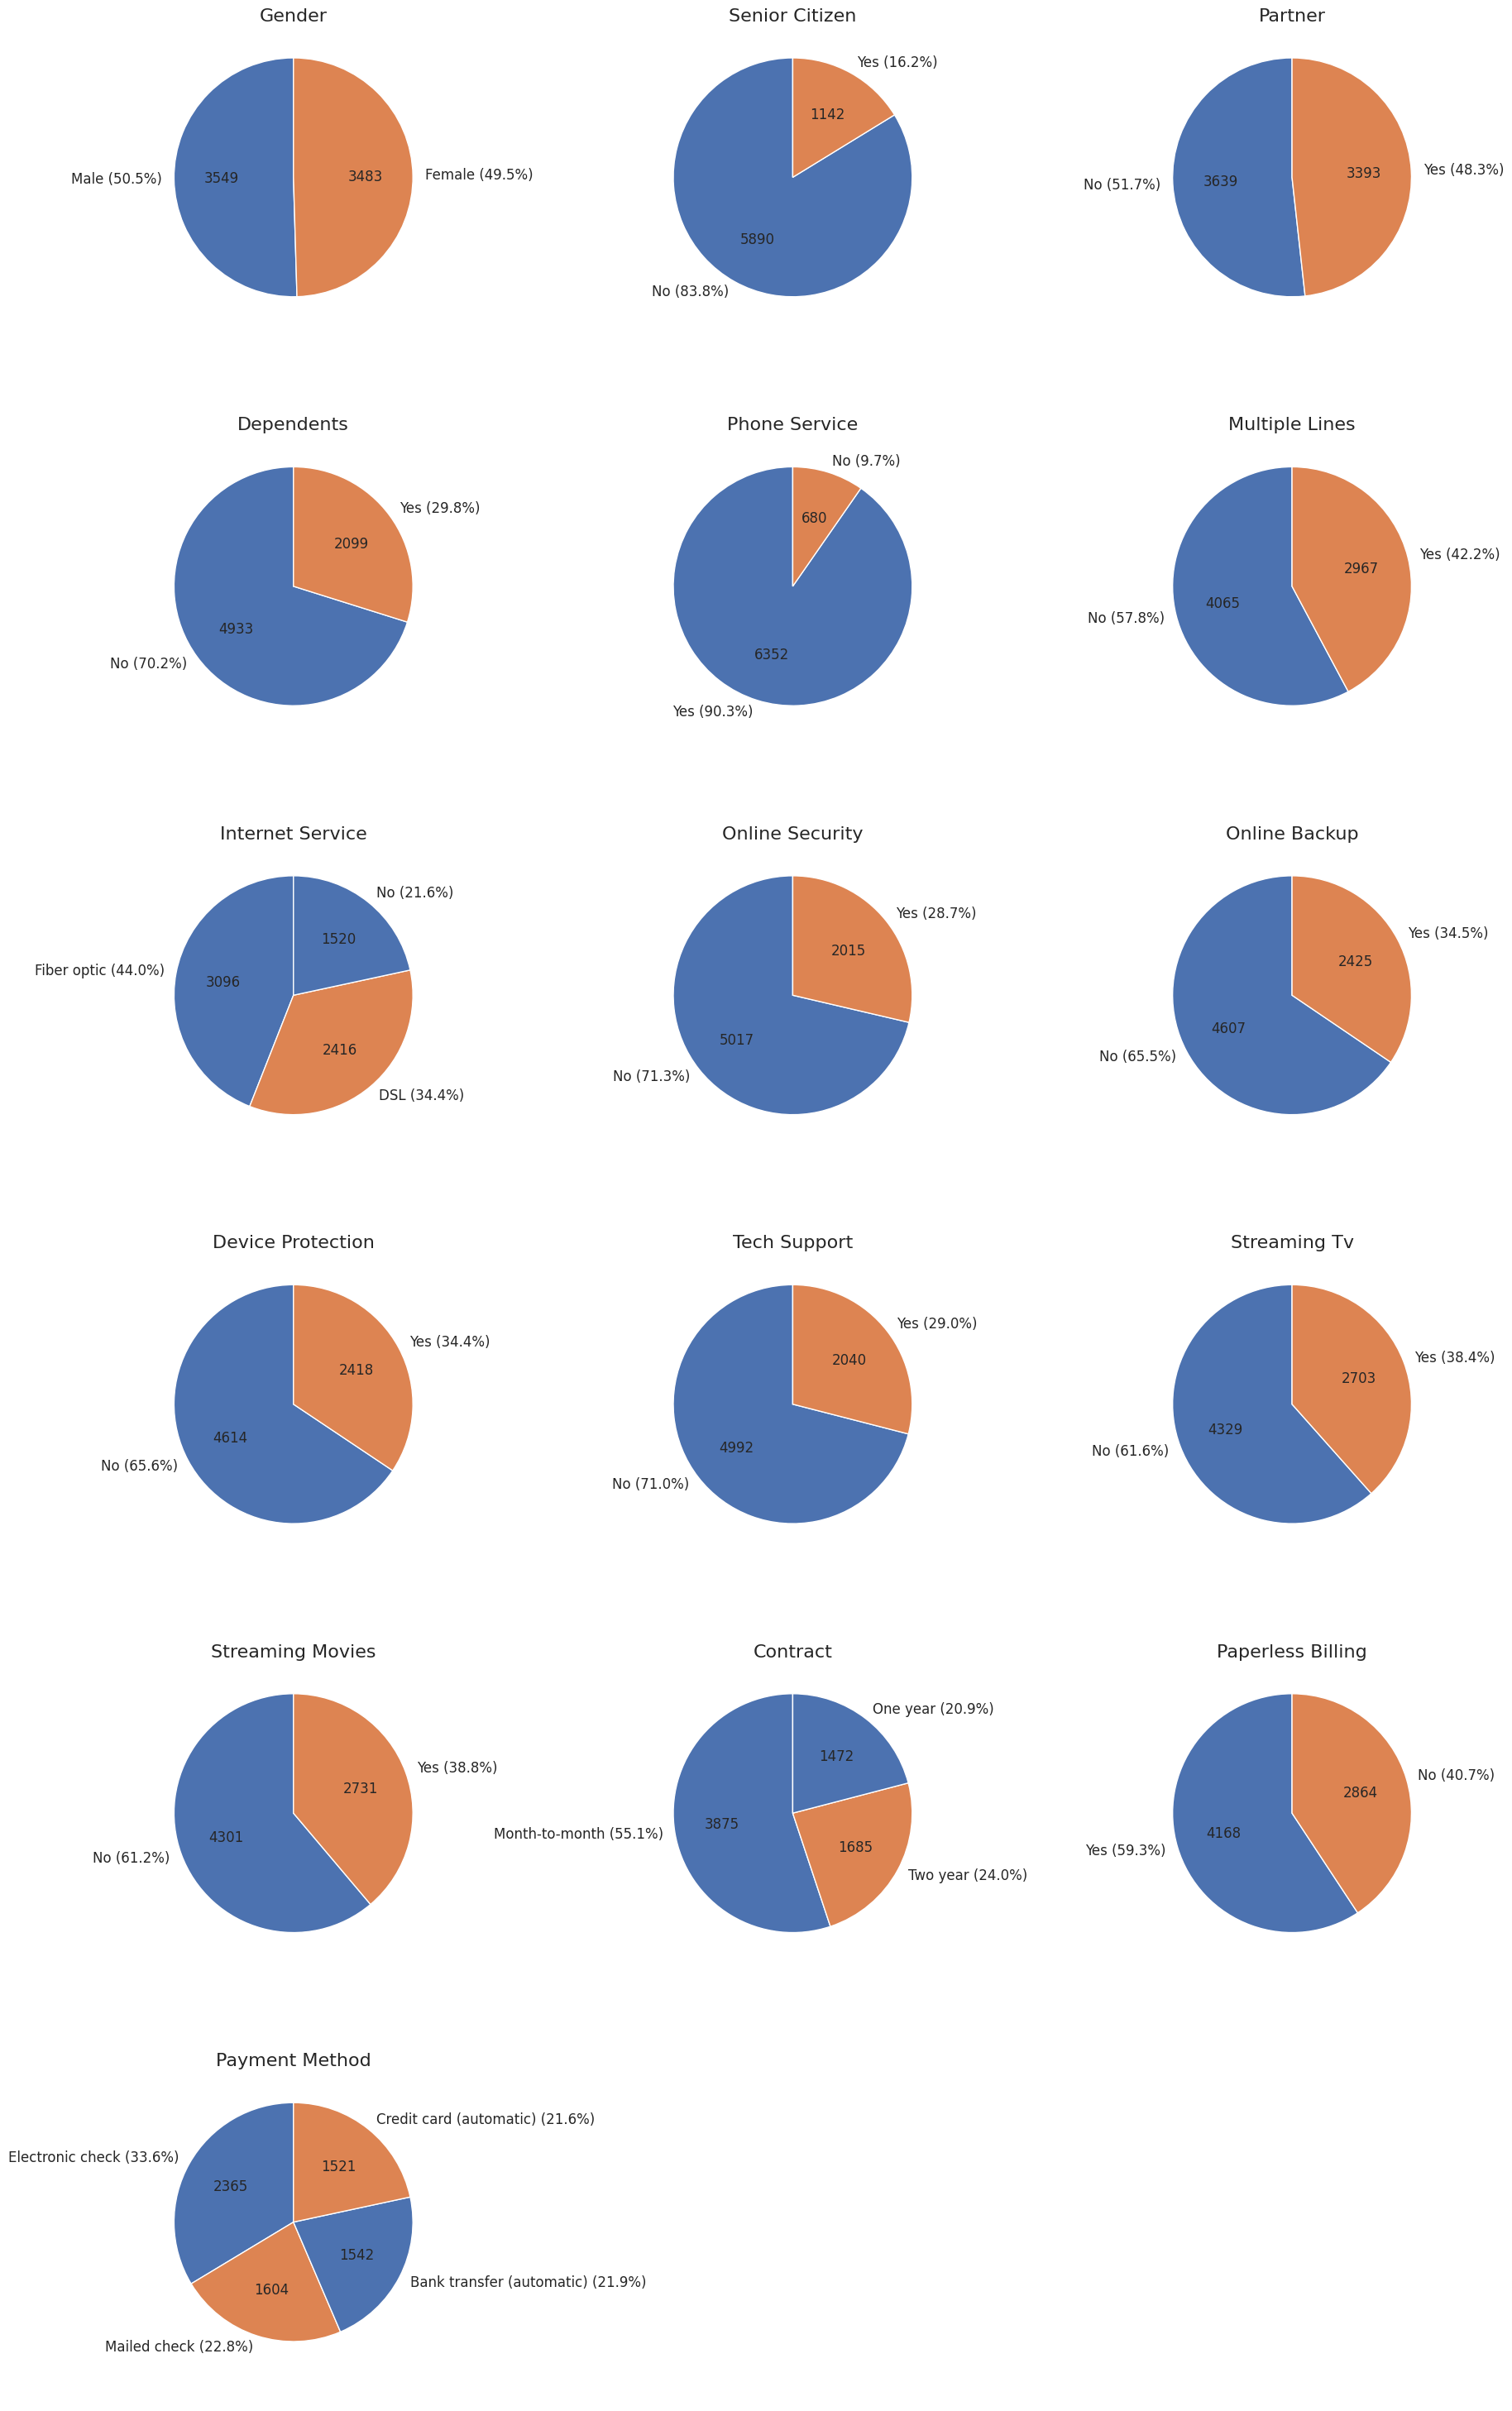

In [55]:
# Ajustar layout para múltiplos gráficos de pizza de variáveis categóricas
# Substituir a query por uma lista manual das colunas qualitativas/categóricas
# Baseado nas colunas e na análise prévia, estas parecem ser as variáveis categóricas relevantes.
variaveis_qualitativas = [
    'gender',
    'senior_citizen',
    'partner',
    'dependents',
    'phone_service',
    'multiple_lines',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'contract',
    'paperless_billing',
    'payment_method'
]


# Lista de variáveis binárias (0/1 que representam No/Yes para plotagem).
# Atualizei esta lista para corresponder aos nomes de colunas no DataFrame normalizado.
variaveis_binarias = ['churn', 'senior_citizen', 'phone_service', 'multiple_lines',
                      'online_security', 'online_backup', 'device_protection', 'tech_support',
                      'streaming_tv', 'streaming_movies', 'partner', 'dependents', 'paperless_billing']

# Redefinir número de colunas e linhas para os subplots (usando 3 colunas para uma visualização mais compacta se houver muitas variáveis)
ncols = 3
nrows = int(np.ceil(len(variaveis_qualitativas) / ncols))  # Calcular o número de linhas com base no número de variáveis

# Criar figura e eixos com tamanho ajustado
# Ajuste o tamanho base por subplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 5))
axes = axes.flatten()

# Iterar pelas variáveis qualitativas para criar cada gráfico de pizza
for i, variavel in enumerate(variaveis_qualitativas):

    # Verificar se o índice i está dentro dos limites dos eixos
    if i < len(axes):
        ax = axes[i] # Atribuir o eixo atual

        # Obter as contagens absolutas para cada categoria da variável
        counts = df_normalizado_completo[variavel].value_counts()
        # Converter os índices para string (para a plotagem)
        etiquetas = counts.index.astype(str)

        # Se a variável for binária, trocar os valores "0"/"1" por "No"/"Yes" somente na plotagem
        if variavel in variaveis_binarias:
            # Mapear os valores 0 e 1 para 'No' e 'Yes'.
            # Se houver outros valores, eles serão mantidos como string.
            etiquetas = [
                'Yes' if lbl.strip() == '1' else
                'No' if lbl.strip() == '0' else
                lbl for lbl in etiquetas
            ]


        valores = counts.values

        # Criar gráfico de pizza com autopct vazio para customização manual
        wedges, texts, autotexts = ax.pie(
            valores,
            labels=etiquetas,
            autopct='',
            startangle=90,
            colors = ['#4c72b0', '#dd8452'],
            wedgeprops={"edgecolor": "white"}
        )

        # Adicionar os valores absolutos dentro das fatias
        for autotext, valor in zip(autotexts, valores):
            autotext.set_text(f'{valor}')
            autotext.set_fontsize(12)

        # Calcular as porcentagens para cada fatia
        porcentagens = valores / valores.sum() * 100
        # Atualizar os textos das labels para exibir a porcentagem ao lado da etiqueta
        # Verificar se o texto original não é vazio antes de adicionar a porcentagem
        for text, pct in zip(texts, porcentagens):
             original_text = text.get_text()
             if original_text: # Adicionar a porcentagem apenas se o texto original não for vazio
                 text.set_text(f'{original_text} ({pct:.1f}%)')
             else: # Se for vazio, apenas exibir a porcentagem (menos comum para rótulos de pizza)
                 text.set_text(f'({pct:.1f}%)')
             text.set_fontsize(12)


        # Definir título do gráfico
        # Ajuste o tamanho da fonte do título
        ax.set_title(f"{variavel.replace('_', ' ').title()}", fontsize=16)

    else:
        # Esta condição não deve ser alcançada se nrows e ncols forem calculados corretamente,
        # mas serve como proteção caso existam mais variáveis do que subplots.
        print(f"Aviso: Não há subplots suficientes para a variável '{variavel}'")

# Remover eixos vazios, se houver
for j in range(len(variaveis_qualitativas), len(axes)):
    axes[j].axis("off")

# Ajustar layout e exibir figura
# Pode tentar ajustar padding se tight_layout não for suficiente
plt.tight_layout(pad=2.0) # Aumente o valor de 'pad' se ainda houver sobreposição
plt.show()

#**Extra: Análise de Correlação entre Variáveis**

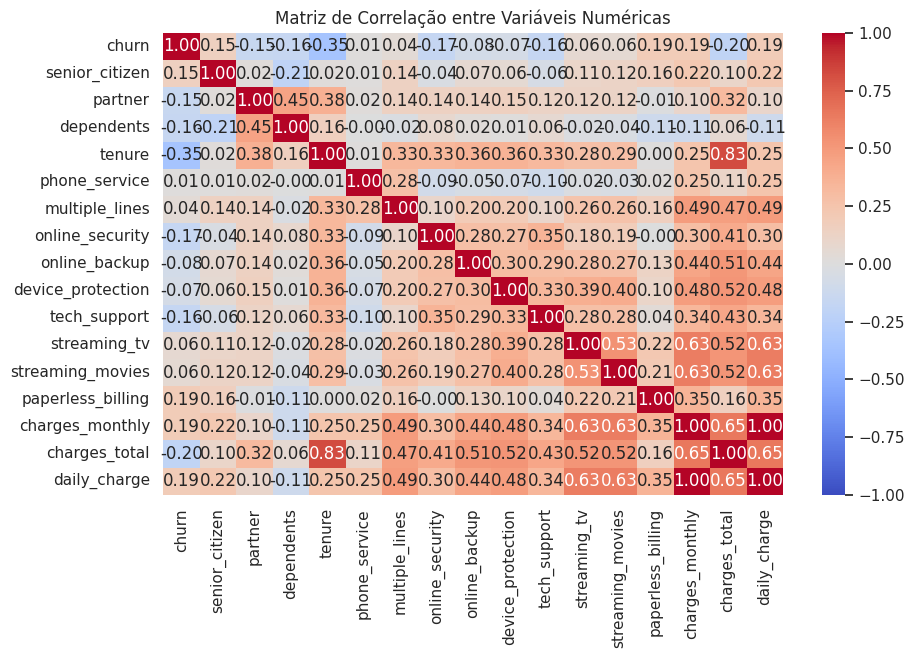

In [56]:
# Seleciona apenas colunas numéricas
df_corr = df_normalizado_completo.select_dtypes(include=['int64', 'float64'])

# Calcula correlação
correlacoes = df_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

tenure: correlação negativa → quanto mais tempo de casa, menor a chance de churn.

charges_total: também negativa → clientes antigos gastaram mais e tendem a ficar.

charges_monthly ou contas_diarias: correlação positiva leve → quem paga mais, tende a sair mais.

In [57]:
correlacoes_churn = correlacoes['churn'].sort_values(key=abs, ascending=False)
print(correlacoes_churn)

churn                1.000000
tenure              -0.354049
charges_total       -0.199484
charges_monthly      0.192858
daily_charge         0.192792
paperless_billing    0.191454
online_security     -0.171270
tech_support        -0.164716
dependents          -0.163128
senior_citizen       0.150541
partner             -0.149982
online_backup       -0.082307
device_protection   -0.066193
streaming_tv         0.063254
streaming_movies     0.060860
multiple_lines       0.040033
phone_service        0.011691
Name: churn, dtype: float64


In [58]:
fig = px.violin(
    df,
    x='churn',
    y='daily_charge',
    color='churn',
    box=True,
    points='all',
    title='Distribuição e Densidade do Gasto Diário por Churn',
    labels={
        'churn': 'Status do Cliente',
        'daily_charge': 'Gasto Diário Estimado (R$)'
    },
    color_discrete_map={'Permaneceu': '#66c2a5', 'Saiu': '#fc8d62'}
)

fig.show()

In [61]:
%pip install -U kaleido

In [63]:
# Salvar o gráfico Plotly como um arquivo PNG para exibição estática no GitHub
fig.write_image("daily-charge-churn-violin-plot.png")

![Image](https://github.com/user-attachments/assets/50affed3-a406-4559-b55c-c957a40770d6)

#📄Relatorio Final

# Análise de Evasão de Clientes (Churn) | Telecom X

## 🧾 Introdução

A Telecom X enfrenta um **alto índice de cancelamentos de clientes**. Para evitar a evasão, aumentar a retenção, é necessário compreender os fatores que possam influenciar essa evasão, conhecido como **churn**.

Este projeto teve como objetivo analisar os dados de clientes da empresa para **identificar padrões e possíveis causas de cancelamento**, com foco em variáveis do perfil do cliente, dos contratos e de consumo.

## 🔬 Tratamento de Dados e das suas inconsistências

Seguimos os seguintes passos:

* 📡 **importação das bibliotecas** (import pandas as pd; import numpy as np; import seaborn as sns; import matplotlib.pyplot as plt; import plotly.express as px)

* 📥 **Importação de dados JSON** via API simulada.
* ⚖️ **Normalização de colunas aninhadas** (`customer`, `phone`, `internet`, `account`, e `charges` dentro do `account`).
* 💱 **Transformar os dados da coluna `total_charges` de strings para "float64" (Decimais).**
* 🗑️ **Remoção de registros com valores ausentes**, especialmente em `TotalCharges` e `Churn`.
* ⚖️ **Padronização da mesma informação com "texto" diferente.** (`multiple_lines´, ´online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`. Continham ['No' 'Yes' 'No (Nome do Produto) service'] Considerei toda linha com 'No (Nome do Produto) service' igual a 'No'. Assim estas colunas ficaram somente com dados ['No' 'Yes'].
* 💱 **Conversão de variáveis binárias** de `"Yes"/"No"` para `1/0`.
* 🌏 **Padronização de nomes de colunas** para o formato `Snake_case` (ex: `charges_total`).
* 🧮 **Criação da variável derivada `dayle_charge`**, com base no gasto mensal.

## 🕵️‍♂️ Análise Exploratória de Dados (EDA)

A seguir, apresentamos os principais resultados exploratórios, divididos em categorias:

### 🩺 Distribuição Geral do Churn

* **Cerca de 26,6% dos clientes cancelaram** seus serviços.
* Gráficos de **barras** e **pizza** evidenciam o problema de retenção.

### 👨🏻‍💻 Churn por Variáveis Categóricas

Foi analisada a evasão por variáveis como `tipo de contrato`, `forma de pagamento`, `internet_service`, entre outras.

Principais achados:

* Clientes com **contrato mensal** têm **alta taxa de churn**.
* Formas de pagamento como **"Electronic Check"** estão mais associadas à evasão.
* Clientes que **não possuem serviços extras** (como `tech_support`, `online_security`) tendem a sair com mais frequência.

*As análises incluíram gráficos interativos com Plotly e proporções (%) por grupo.*

### 📈 Churn por Variáveis Numéricas

Foram analisadas variáveis como:

* `tenure` → tempo como cliente
* `charges_monthly` → gasto mensal
* `charges_total` → gasto total acumulado
* `dayle_charge` → gasto diário estimado

Padrões observados:

* **Clientes com menor tempo de contrato (`tenure` baixo)** tendem a cancelar mais.
* **Churn mais comum entre clientes com faturas mensais altas.**
* **Clientes com `charges_total` com valores menores** (Contratos novos, menos serviços) apresentam churn elevado.

Gráficos de **histogramas** e **boxplots** foram utilizados para visualizar esses padrões.


## 📣 Conclusões e Inferências

* A análise do churn revela padrões importantes sobre os clientes que cancelam seus serviços. Observamos que a evasão é predominantemente registrada entre usuários que possuem pouco tempo de contrato com a empresa.

* Há também, os clientes com contratos mensais apresentam os maiores índices de churn, sugerindo uma maior vulnerabilidade desse modelo de assinatura. A cobrança via electronic check também se destaca como um fator associado ao cancelamento, possivelmente devido à pouca praticidade desse método de pagamento.

* Clientes que pagam mais por mês e não utilizam serviços adicionais estão mais propensos a cancelar, reforçando a importância de agregar valor à experiência do cliente.

* Clientes mais antigos tendem a ser mais fiéis, apontando para a importância do onboarding e fidelização inicial.

* Pacotes com múltiplos serviços demonstram retenção mais eficaz.


## 🏹 Recomendações

Com base nas estatítiscas medidas e nas inferências das observações, recomenda-se que a Telecom X adote estratégias para minimizar a evasão e fortalecer a retenção de clientes:
1. **Incentivar contratos de longo prazo:** Criar programas de fidelidade, oferecer descontos progressivos ou benefícios exclusivos para clientes que optam por assinaturas anuais.

2. **Ampliar o valor dos serviços adicionais:** Estimular a adesão a pacotes como suporte técnico premium, segurança online ou benefícios exclusivos para quem utiliza mais serviços da empresa.

3. **Revisar métodos de pagamento:** Reduzir a dependência do electronic check, promovendo opções mais convenientes como débito automático, cartão de crédito ou PIX, para facilitar transações e reduzir cancelamentos.

4. **Aprimorar o suporte nos primeiros meses:** Implementar uma jornada de boas-vindas personalizada, com contato proativo, ofertas especiais e suporte dedicado para os novos clientes.

5. **Oferecer pacotes com múltiplos serviços essenciais com desconto** (ex: suporte técnico + backup).

6. **Incentivar contratos de longo prazo** com benefícios claros para reduzir evasão mensal.

7. **Monitorar novos clientes** nos primeiros meses com campanhas de retenção e atendimento proativo.

7. **Avaliar descontos em planos com fatura muito elevada**, pois estão associados a maiores taxas de churn.

8. **Estudar os perfis com churn elevado para campanhas personalizadas de reengajamento**.

9. Estudo detalhado das informações da "entrevista" do cancelamento do contrato.

🎯 Próximos Passos
Preparar os dados para uma modelagem preditiva.

Aplicar técnicas de balanceamento de classe (SMOTE, undersampling) para corrigir o desbalanceamento da variável Churn.

Treinar e avaliar modelos preditivos com foco em interpretabilidade e ações práticas.